# A Python Introduction for C/C++ Users

## Introduction


_This is a Jupyter notebook rendered as a page of a Jupyter book. Please see [this page]() for more information on the additional functionality available_.

Python and the C/C++ language family share some common features and a lot of common syntax, but have (somewhat)separate histories and are set up to make different problems "easy". This page describes some of the most important ways the two languages differ, as well as some similarities between them. It is intended for confident C/C++ programmers attempting to transition to working with Python. Those struggling with Python in general should start with the Intro to Python pages.

## Some key differences

### Python is interpreted, C/C++ is compiled

C-like languages use a compiler to convert the human-readable source code directly into an executable file which will run on a specific computer (and possibly on ones sufficiently similar to it). Python and other similar interpreted languages use a single program runtime to convert code instructions into operations the computer can understand _at the time that it is run_. Since this conversion takes computing power, this tends to mean that individual instructions run more slowly, however the time to run & test new code is reduced, and it tends to be less work for a user to get new code running on their machine.

This fits into a narrative in which Python is developer friendly, while C++ is efficient once it works. This is generally true, although all sides of the argument have exceptions. An example of this user friendliness is the Python version of the common "Hello World!" program:

In [1]:
print("Hello World!")

Hello World!


This is genuinely executable as a one liner. Meanwhile minimal executable C++ version might look like

```C++
#include <iostream>

int main() {
    std::cout << "Hello, World!" << std::endl;
    return 0;
}
```

### Python is dynamically typed

Unlike the C family, which uses a strongly enforced static, typing system, where variables must be of one fixed data type (possibly with some base classes) and the compiler sanity checks that variables are being properly used at run time, Python uses weak, dynamically updated typing. This means that a single variable name might evaluate to several different data types over the course of its lifetime. It might start as an integer, be bound to a float following a division operator and then end up as a string. 

This means that in Python variables don't need to be formally declared (and in fact, they can't be, although you can note an intended type to a human reader). Rather than writing
```C
int x=3;
int y=x+3;
```
one can just write
```python
x = 3
y = x+3
```
Providing what's been written makes sense to the Python interpreter, it will silently do whatever it considers best to transform the data as necessary while evaluating expressions. This is another feature which makes Python quick to write when developing, although it can cause some difficulty in finding mistakes. For example, a spelling mistake can accidentally create a new variable. We will cover some strategies to minimize these sorts of error during the first module on the course.

### Use # symbols for Python comments

Python takes its inspiration for comments from shell scripting languages and uses `#` at the start of a line, or following a statement to indicate a comment. However, Python also makes significant use of a concept called "docstrings" where string literals are included as the first line of files, classes or functions. These act as both source comments and documentation for the inbuilt help system.

In [2]:
# This is a regular comment
def my_function(x, y):
    """
    Do a calculation.
    
    This is is a docstring
    
    Parameters
    ----------
    x : int
    y : int
    """
    
    return x+2*y # This is also a comment

### No semicolons, fewer brackets

Where C-like languages use semicolons to denote the end of individual statements, Python typically uses new lines. Similarly, where C uses `{` and `}` to indicate the start and end of blocks (e.g., to denote scope, to indicate the cases of a `if` statement, or to mark the limits of a loop, Python uses colon characters and whitespace. This means that a C `if` block like

```C
if (val>27) {
    option_one(val);
} else if (val>7) {
    option_two(val);
} else {
    default_option(val);
}
```

changes in Python to

```python
if val>27:
    option_one(val)
elif val>7:
    option_two(val)
else:
    default_option(val)
```


### No explicit Python pointers

Python's variable and data model differs somewhat from the C one. In one sense you could say that there are no pointers, in another you could say that every variable name in Python is a pointer (and indeed this is roughly how the CPython implementation works with them, using C `struct`s to hold the individual objects). 


In Python everything (including numbers like `int`s or `float`s) is an object. Variable names are "bound" to objects using the assignment operator `=`. This binding process has implications on how assigning to one name affects another. Lets have a concrete example

In [3]:
x = 7
print(x)

7


We can draw a diagram of the situation in terms of names and objects

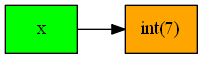

In [4]:
y = x
print('x is ', x)
print('y is ', y)

x is  7
y is  7


We can diagram this again, note that `y` binds to the object `x` is bound to, not to the name `x` itself.

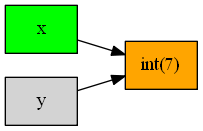

In [5]:
y /= 2
print('x is', x)
print('y is', y)

x is 7
y is 3.5


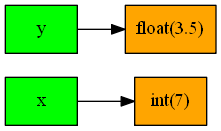

It's likely that none of that feels too surprising given your previous experience, but lets also do an example with a Python `list`, which behaves something like a C++ STL vector:

In [6]:
a = list([1,2,3])
b = a

# The append method adds its argument to the end of the list, like a C++
# vector push_back
b.append(4) 

print('a is', a)
print('b is', b)

a is [1, 2, 3, 4]
b is [1, 2, 3, 4]


Here is where the name acts something like a pointer, both the names `a` and `b` are accessing the same object, and updating it via one route is visible via the other.

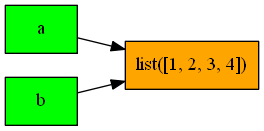

the builtin Python `id()` function can be used to get a unique identity for the object a name is bound to. In CPython, this actually is the integer form of the memory address of the `struct` holding the object.

### Python is "pass by object"

The explanation in the last section extends to function calls as well. The basic syntax in C passes function arguments by setting the dummy variables in the function signature equal to the evaluated values of the expressions given in the original function call ("pass by value"). By using pointers and the C reference operator `&` (which doesn't exist in Python), copy operation can be avoided, allowing C functions to also work on the original entity (pass by reference).

In Python, the name or names chosen in the function signature are bound to the object resulting from evaluating the input expression. This means that once again, when using immutable data types like `int`s or `float`s it can feel like pass by value, since the original object doesn't change when used in operations, while when using "mutable types like lists or user defined classes it feels like pass by reference since changes stick. As concrete examples, consider the following two blocks of code:

In [7]:
def f(x):
    """Function with an immutable input"""
    x = x+7
    
a = 3
f(a)
print(a)

3


In [8]:
def g(y):
    """Function call with a mutable input"""
    y.append(4)
    
b = [1, 2, 3]
g(b)
print(b)

[1, 2, 3, 4]


## Some key similarities

### The default data types match up

The default Python data types mostly have C++ equivalents, sometimes from the STL, sometimes also in C:

|Python type| C++ type   | Notes  |
|---|---|---|
| `str`  | `std::str`   |   |
| `int`  | `long`  | Python also allows longer integers  |
| `float`  | `double` | Note this is 64bit, not a 32 bit `float`   |
| `complex` | `std::complex<double>` |  |
| `list` | `std::vector` | Python lists hold any object |
| `tuple` | `const std::array` | |
| `dict` | `std::unordered_map` | Python `dict` values can be any object |
| `set`  | `std::unordered_set` | Python `set` values can be any object |
| `frozenset` | `const std::unordered_set` | Python `frozenset` values can be any object |
| `bool` | `bool` | Python writes it as `True` & `False` |
| `bytes` | `char[]` | |

As seen in the notes column, the biggest differences are that Python has support for arbitrarily large integers, e.g.

In [9]:
x = 2**1000
print(x)

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376


and that the default Python containers can hold any object (including functions!). After all, there is no type checking to mean it shouldn't be allowed. Obviously, this is great for convenience, but less good for computational efficiency. For examples of efficient, multidimensional containers for a single data type (as would be useful for numerical calculations) then `numpy` arrays are generally preferred. You can read more [here]().

### Many operators translate

As befits its heritage, many of the operators used in Python match with those used in `C`.

|Operation|Python| C/C++ | Notes  |
|---|---|---|---|
|Addition|`+`|`+`||
|Subtraction|`-`|`-`||
|Division|`/`(floating) `//` (integer)|`/`||
|Scalar multiplication| `*` | `*` |
|Matrix multiplication| `@` | None | No default C/C++ matrix implementation|
|Exonentiation| `**` | None | C/C++ uses function call |
|Modulus | `%` | `%` ||
|Equal|`==`|`==`||
|Not equal|`!=`|`!=`||
|Less/greater than| `<` or `>` | `<` or `>` ||
|Less/greater than or equal to | `<=` or `>=`| `<=` or `>=`||
| Logical and | `and` | `&&` ||
| Logical or | `or` | `||` ||
| Logical not | `not`|`!`||
| Bitwise operators | `&`,`\|`,`^`,,`~`,`<<`,`>>`| `&`,`\|`,`^`,`~`,`<<`,`>>`| Not greatly used in Python |
| Identity | `is`, `is not`| None | Tests that two names point to the same object|
| Membership | `in`, `not in` |None| Tests if an object is in a container |

The arithimetic operators (e.g. `+`, `-`) have in place assignment versions (e.g. `+=`, `-=`) in Python too. The only exception is that there are no increment or decrement operators (i.e. `++` and `--` don't work), since they don't fit into the Python data model.

### Many (but not all) control structures translate directly

Most control structures available in C are also available in Python. You can write `if` loops (including `else if` and `else` blocks), `while` loops (not `do` ... `while` loops, although the effect is easy to emulate) and `for` loops. Loop behaviour can be modified with `break` and `continue` statements. 

Before Python 3.10, the biggest missing option was the `switch` statement, which had to be emulated, either using an `if`, `elif` block or (in a more "Pythonic" way) using a Python dictionary. In recent version of Python, the `match` statement has been added, which acts somewhat similarly. An example Python function might be

```python

def check_input(value):
    match value:
        case 1:
            print("You entered one")
        case 'one'|'One':
            print("You entered one")
        case int(n) if 1<n<5:
            print(f"You entered {n}")
        case _:
            print("You entered something else")
```

As you will see, the pattern matching is significantly more powerful than the C `switch` statement, and can be used to match on types, values, or even to extract values from the input. You can read much more about the `match` statement [here](https://peps.python.org/pep-0634/).

### Namespaces are important [C++]

As with C++ Python uses namespaces _a lot_ to make sure that different packages with functions given the same name don't interact with each other. When a package is imported

```python
import os
```

Then its various functions and members are available as (e.g) `os.curdir()`. If you wish to change the token used to refer to a package, then the `import X as Y` variant of the `import` statement can be used, e.g.:

```python
import numpy as np
```

If you want to copy a function from a package into the local namespace, then the form `from X import Y` can be used. Some introductory texts use the form
```
from numpy import *
```

to get (almost) all functions from a package. This is generally considered a bad idea in production code, similar to `using namespace std` in C++ code.

## Further Reading
### Pages from this book

- The undergraduate {doc}`introduction to python <..\primer\notebooks\intro>` material.
- Some {doc}`additional tips and techniques <AdditionalTechniques>`.